In [1]:
import cv2
import face_recognition
import pickle
import time

K-nearest neighbor : 특성 값을 통해 어디에 가장 가까운지 파악
- 정확도가 높지 못함
- 실전에서는 SVM, face_landmark 등 기법을 사용하여 정확도를 향상시킴  

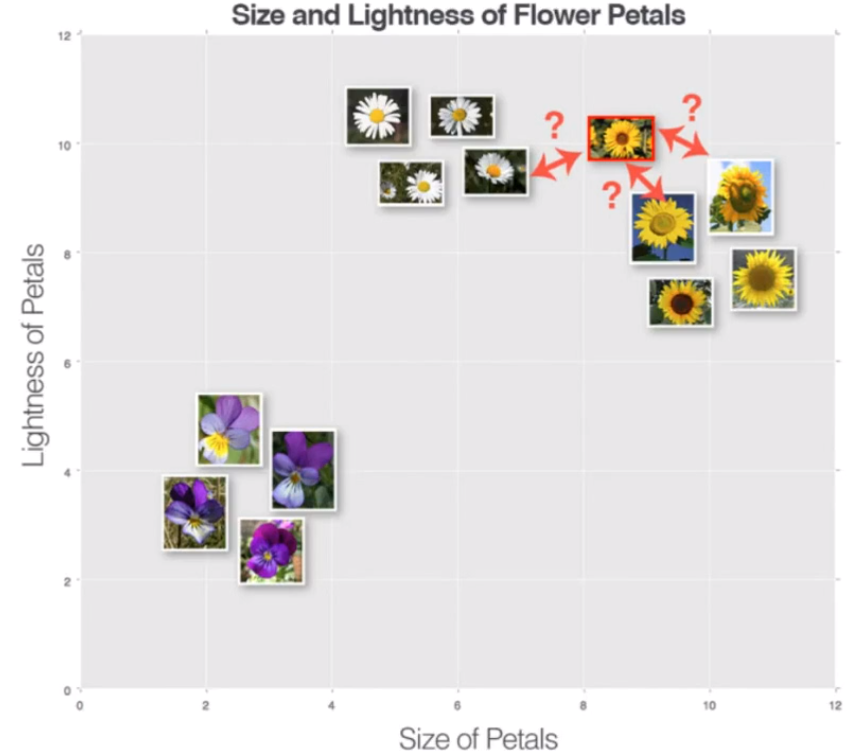

In [2]:
def detectAndDisplay(image):
    # 시간 측정을 위해 시작시간 설정
    start_time = time.time()
    # BGR to RGB 변환
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # detect the (x, y)-coordinates of the bounding boxes corresponding
    # to each face in the input image, then compute the facial embeddings
    # for each face
    # 이미지에서 얼굴을 인식한다.
    boxes = face_recognition.face_locations(rgb,
        model=model_method)
    # 얼굴 인식 특성들을 encoding 한다.
    encodings = face_recognition.face_encodings(rgb, boxes)

    # initialize the list of names for each face detected
    names = []

    # loop over the facial embeddings
    for encoding in encodings:
        # attempt to match each face in the input image to our known
        # encodings
        # 이전에 만들어놓은 data값과 지금 만들은 data값(encoding 값들)을 비교한다. 
        # KNN-Classifier, 사전에 train해 놓은 특징 값과 새로운 이미지에서 찾은 특징 값들의 비교를 통해
        # train 해 놓은 특징과 가장 유사한 특징을 새로운 이미지에서 찾아낸다.
        matches = face_recognition.compare_faces(data["encodings"],
            encoding)
        name = unknown_name

        # check to see if we have found a match
        # encoding 값들을 비교하여 
        if True in matches:
            # find the indexes of all matched faces then initialize a
            # dictionary to count the total number of times each face
            # was matched
            # match 된 내용들의 index값들을 저장해놓는다.
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}

            # loop over the matched indexes and maintain a count for
            # each recognized face face
            # Tedy 와 Son 중 이름을 선택한다.
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1

            # determine the recognized face with the largest number of
            # votes (note: in the event of an unlikely tie Python will
            # select first entry in the dictionary)
            name = max(counts, key=counts.get)
        
        # name 배열에 이름 값을 저장해준다.
        # update the list of names
        names.append(name)

    # 화면에 box 쳐주는 코드(boxes : 얼굴의 위치, names : 이름)    
    # loop over the recognized faces
    for ((top, right, bottom, left), name) in zip(boxes, names):
        # draw the predicted face name on the image
        # 올바르게 찾은 얼굴 초록색 box
        y = top - 15 if top - 15 > 15 else top + 15
        color = (0, 255, 0)
        line = 2
        # unknown_name 이라면 빨간색 box
        if(name == unknown_name):
            color = (0, 0, 255)
            line = 1
            name = ''
            
        # 이미지에 사각형을 그려준다.    
        cv2.rectangle(image, (left, top), (right, bottom), color, line)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
            0.75, color, line)
    
    # 끝나는 시간 설정
    end_time = time.time()
    # 실행 시간 출력
    process_time = end_time - start_time
    print("=== A frame took {:.3f} seconds".format(process_time))
    # show the output image
    cv2.imshow("Recognition", image)

In [3]:
image_file = 'D:/opencv_dnn_202005/opencv_dnn_202005/image/soccer_01.jpg'
encoding_file = 'D:/opencv_dnn_202005/opencv_dnn_202005/encodings.pickle'
# accurate와 speed 간의 trade-off, CNN is accurate but slower, HOG is faster but less accurate
model_method = 'cnn'
unknown_name = 'Unknown'

# load the known faces and embeddings
# 이전에 만들어 놓은 pickle 파일을 불러오기
data = pickle.loads(open(encoding_file, "rb").read())

# load the input image
image = cv2.imread(image_file)
detectAndDisplay(image)

cv2.waitKey(0)
cv2.destroyAllWindows()

=== A frame took 1.255 seconds


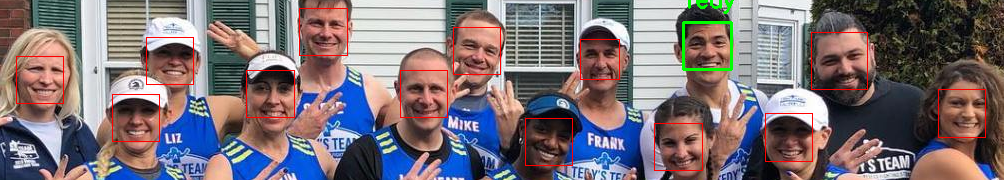